# Neo Price

by: WIdya Meiriska

### 1. Read Dataset

In [2]:
import csv
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/raw/bitcoin/neo_price.csv',parse_dates = ['Date'])

In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
357,2016-09-13,0.374469,0.375092,0.301766,0.309509,"3,337",-
358,2016-09-12,0.376312,0.376671,0.360443,0.374598,"1,116",-
359,2016-09-11,0.390948,0.398459,0.372790,0.376150,879,-
360,2016-09-10,0.558536,0.559143,0.370960,0.391001,811,-
361,2016-09-09,0.181483,0.558951,0.181357,0.558478,"1,349",-


### 2. Data Investigation

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [6]:
df.count()

Date          362
Open          362
High          362
Low           362
Close         362
Volume        362
Market Cap    362
dtype: int64

In [7]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

### There are missing data here and there are several data which have different format. Some of the data do not use number format

In [8]:
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',',''))) 
df['Market Cap'] = df['Market Cap'].replace('-', 'NaN')
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',',''))) 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
Date          362 non-null datetime64[ns]
Open          362 non-null float64
High          362 non-null float64
Low           362 non-null float64
Close         362 non-null float64
Volume        362 non-null float64
Market Cap    315 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 19.9 KB


In [10]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
Date,0,0.000000
Open,0,0.000000
High,0,0.000000
Low,0,0.000000
Close,0,0.000000
Volume,0,0.000000
Market Cap,47,0.129834


I try to fill in the missing value by interpolated the data

In [12]:
# Lets see the correlation between each column
correlation = df.corr(method="pearson")
correlation['Market Cap']

Open          1.000000
High          0.992478
Low           0.995025
Close         0.990857
Volume        0.747026
Market Cap    1.000000
Name: Market Cap, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

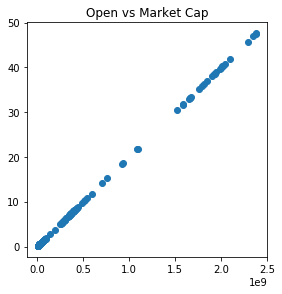

In [21]:
#Plot data to see the relation between each column
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
O = df['Open']
MC = df['Market Cap']
plt.subplot(5,5,5)
plt.scatter(MC, O)
plt.title('Open vs Market Cap')

plt.show

To fill the NaN value I try to interpolate the data using linear method using value from Open column. Because from the information above we can see that Market Cap has the closest correlation with Open.

In [13]:
from sklearn import linear_model

model = linear_model.LinearRegression()
Open  = df[['Open']].iloc[0:314]
Market_Cap = df['Market Cap'].iloc[0:314]

In [14]:
#Train model 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
#The model score almost 1 so that indicate the model is near to the truth
model.score(Open, Market_Cap)

0.9999999752642066

Here I make a new column Market Cap Predict which contains Market Cap with no NaN value

In [16]:
#Add a new column which is filled the missing data from model fit
open = df[['Open']]
Market_Cap_Predict = model.predict(open)
df['Market Cap Predict'] = Market_Cap_Predict
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
357,2016-09-13,0.374469,0.375092,0.301766,0.309509,3337.0,NaN,1.872041e+07
358,2016-09-12,0.376312,0.376671,0.360443,0.374598,1116.0,NaN,1.881256e+07
359,2016-09-11,0.390948,0.398459,0.372790,0.376150,879.0,NaN,1.954437e+07
360,2016-09-10,0.558536,0.559143,0.370960,0.391001,811.0,NaN,2.792390e+07
361,2016-09-09,0.181483,0.558951,0.181357,0.558478,1349.0,NaN,9.070967e+06


In [17]:
df.count()

Date                  362
Open                  362
High                  362
Low                   362
Close                 362
Volume                362
Market Cap            315
Market Cap Predict    362
dtype: int64

In [18]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
count,362.000000,362.000000,362.000000,362.000000,3.620000e+02,3.150000e+02,3.620000e+02
mean,4.172486,4.562649,3.760576,4.233630,1.910023e+07,2.380155e+08,2.086241e+08
std,9.946756,10.752224,8.971467,9.990614,5.516568e+07,5.269704e+08,4.973452e+08
min,0.080197,0.085211,0.072287,0.080181,1.560000e+02,5.292100e+06,4.006591e+06
25%,0.139660,0.146120,0.132966,0.139955,2.075275e+04,6.824825e+06,6.979798e+06
50%,0.189495,0.196152,0.179913,0.189814,1.633035e+05,9.234250e+06,9.471573e+06
75%,1.355000,1.542500,1.242500,1.357500,7.408840e+06,2.205580e+08,6.774769e+07
max,47.630000,52.630000,44.790000,47.490000,4.486540e+08,2.381360e+09,2.381532e+09


#### Now the data is clean, no null value and has same format

### 3. Data Visualization

In [19]:
# Set Date as it's index
df.set_index('Date', inplace = True )

Text(0.5,1,'Date vs Market Cap Predict')

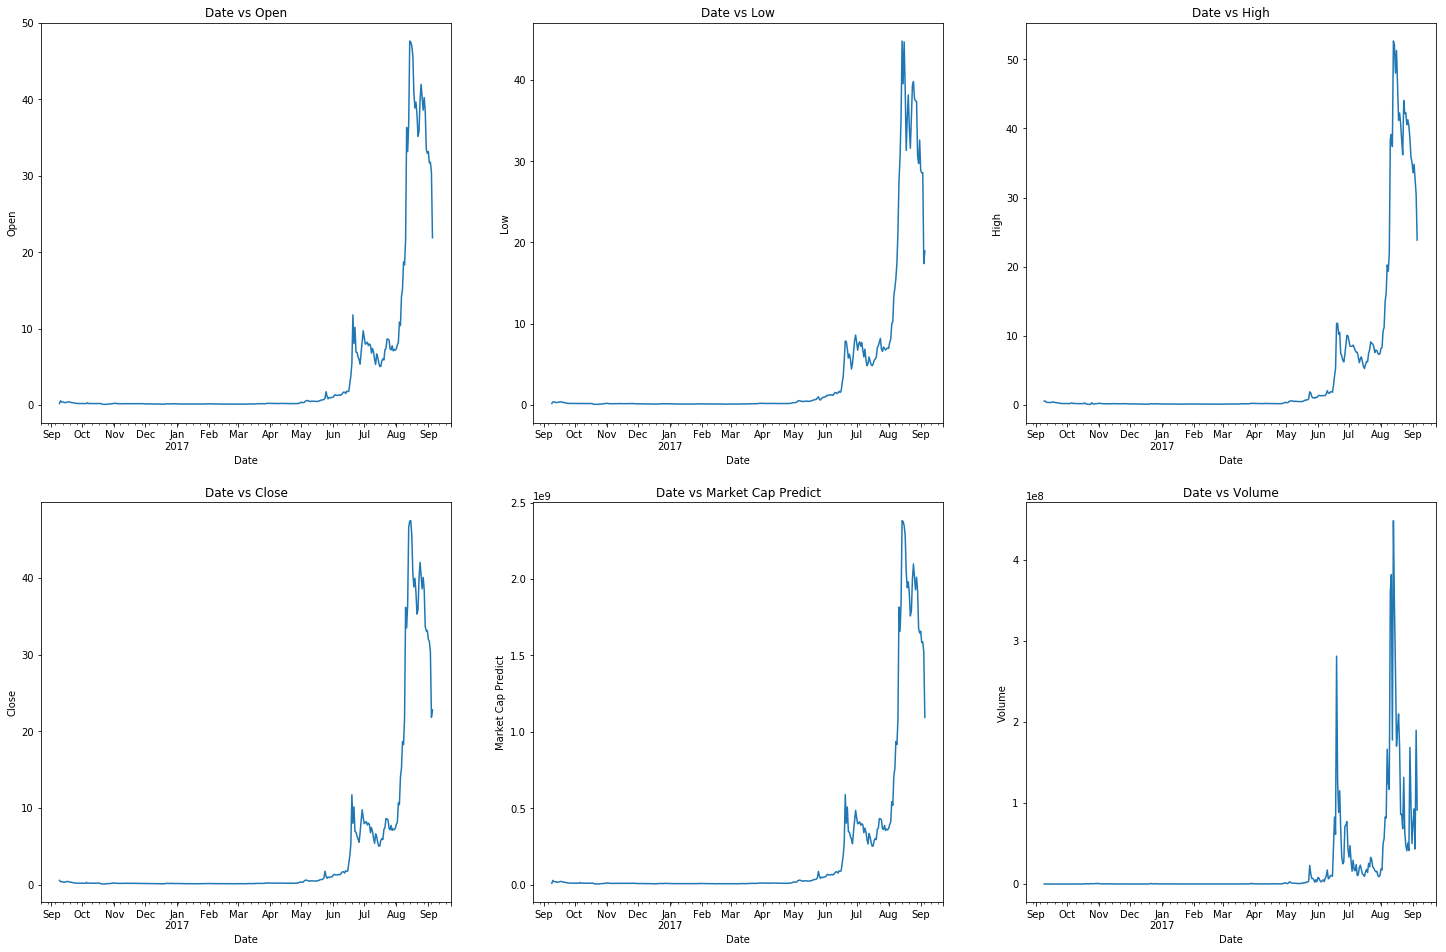

In [23]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
plt.figure(figsize=(25, 25))

plt.subplot(3,3,1)
plt.ylabel('Open')
df.Open.plot()
plt.title('Date vs Open')

plt.subplot(3,3,2)
plt.ylabel('Low')
df.Low.plot()
plt.title('Date vs Low')

plt.subplot(3,3,3)
plt.ylabel('High')
df.High.plot()
plt.title('Date vs High')

plt.subplot(3,3,4)
plt.ylabel('Close')
df.Close.plot()
plt.title('Date vs Close')

plt.subplot(3,3,6)
plt.ylabel('Volume')
df['Volume'].plot()
plt.title('Date vs Volume')

plt.subplot(3,3,5)
plt.ylabel('Market Cap Predict')
df['Market Cap Predict'].plot()
plt.title('Date vs Market Cap Predict')
